In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

 95% 175M/185M [00:01<00:00, 184MB/s]
100% 185M/185M [00:01<00:00, 159MB/s]


In [ ]:
!unzip -o az-handwritten-alphabets-in-csv-format.zip


Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping



Read dataset

In [ ]:
df = pd.read_csv('/content/A_Z Handwritten Data/A_Z Handwritten Data.csv').astype('float32')
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(372450, 785)

In [ ]:
df.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


Split x and y column from dataset

In [ ]:
x = df.drop('0', axis = 1)
y = df['0']

Reshaping images from dataset

In [ ]:
# we are reshaping the train & test image data so that they can be displayed as an image,
# as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)
print('Train Data Shape:', y_train.shape)
print('Test Data Shape:', y_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)
Train Data Shape: (297960,)
Test Data Shape: (74490,)


Creating dictionary of alphabets

In [11]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

show random images

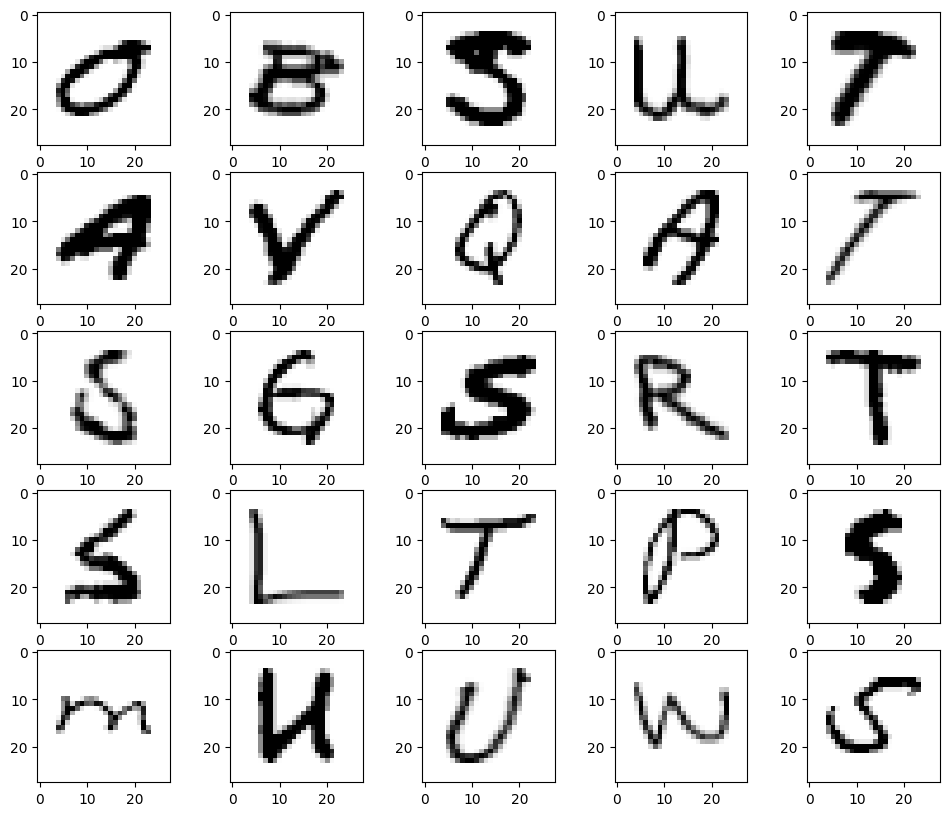

In [ ]:
plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):
    plt.subplot(colums, row, i+1)
    plt.imshow(x_train[i].reshape([28,28]),interpolation='nearest', cmap='Greys')
plt.show()

#Preprocessing

Normalize images

In [ ]:
train_images = x_train / 255.0
test_images = x_test / 255.0


Reshape data

In [ ]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
print("New shape of train data:", train_images.shape)

test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
print("New shape of test data:", test_images.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


convert number to 26 categories

In [ ]:
import tensorflow as tf
number_of_classes = 26
ytrain = tf.keras.utils.to_categorical(y_train, number_of_classes)
ytest = tf.keras.utils.to_categorical(y_test, number_of_classes)

In [ ]:
# Display the shape of the training and testing data
print("X_train shape : ", train_images.shape)
print("X_test shape : ", test_images.shape)
print("y_train shape : ", ytrain.shape)
print("y_test shape : ", ytest.shape)

X_train shape :  (297960, 28, 28, 1)
X_test shape :  (74490, 28, 28, 1)
y_train shape :  (297960, 26)
y_test shape :  (74490, 26)


Split 10% validation


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, ytrain, test_size=0.1, random_state=42)

#CNN

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(26, activation="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200, callbacks=[early_stop],  validation_data=(X_val, y_val))


Epoch 1/10
1341/1341 [==============================] - 325s 243ms/step - loss: 0.1667 - accuracy: 0.9515 - val_loss: 0.0638 - val_accuracy: 0.9818
Epoch 2/10
1341/1341 [==============================] - 314s 234ms/step - loss: 0.0700 - accuracy: 0.9801 - val_loss: 0.0503 - val_accuracy: 0.9854
Epoch 3/10
1341/1341 [==============================] - 310s 231ms/step - loss: 0.0549 - accuracy: 0.9844 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 4/10
1341/1341 [==============================] - 316s 236ms/step - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.0405 - val_accuracy: 0.9885
Epoch 5/10
1341/1341 [==============================] - 316s 236ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0362 - val_accuracy: 0.9896
Epoch 6/10
1341/1341 [==============================] - 309s 230ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0302 - val_accuracy: 0.9918
Epoch 7/10
1341/1341 [==============================] - 311s 232ms/step - loss: 0.0284 - accuracy: 0.9913 - val_

In [ ]:
from keras.models import load_model

# Assuming 'model2' is your trained model
model.save('my_modelcnn.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

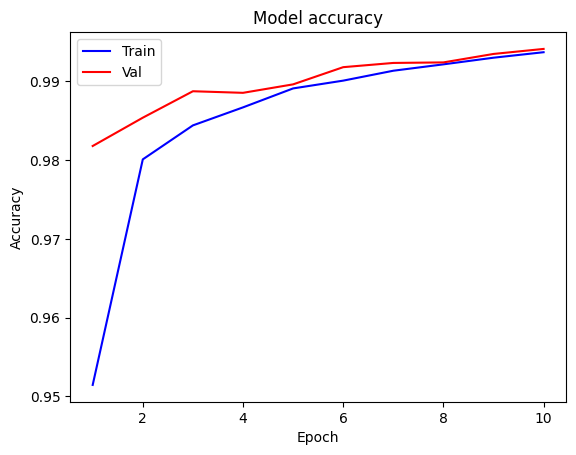

In [ ]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plotgraph(epochs, acc, val_acc)

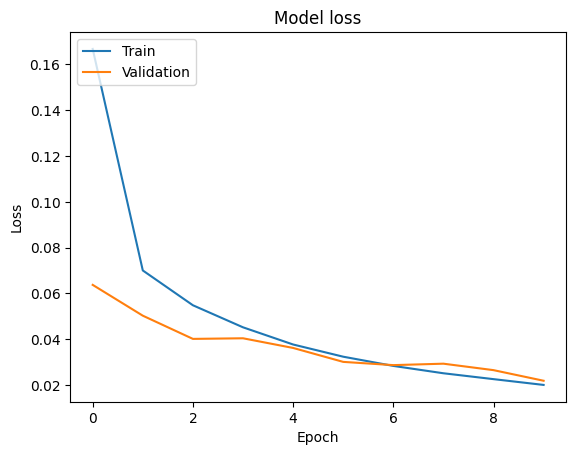

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_images, ytest, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.76%
Validation Accuracy: 99.41%
Test Accuracy: 99.37%


#Prediction

In [ ]:
loaded_model.load_weights("/content/my_modelcnn.h5")

In [ ]:
from keras.models import load_model
model_path = '/content/my_modelcnn.h5'
loaded_model = load_model(model_path)

1/1 [==============================] - 0s 86ms/step


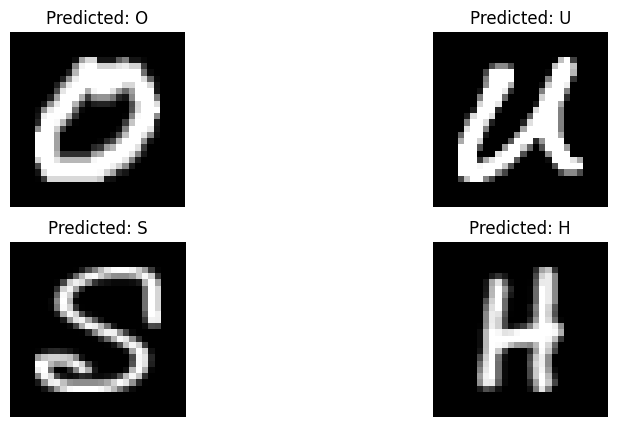

In [ ]:
selected_images = X_val[2384:2388]

# Make predictions for each image
predictions = loaded_model.predict(selected_images)

# Plot the images and predictions
plt.figure(figsize=(10, 5))
for i, (image, prediction) in enumerate(zip(selected_images, predictions), start=1):
    # Get the predicted label
    predicted_label = word_dict[np.argmax(prediction)]

    # Plot the image
    plt.subplot(2, 2, i)
    plt.imshow(image[:, :, 0], cmap='gray')  # Assuming images are grayscale
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')

plt.show()

1/1 [==============================] - 0s 26ms/step


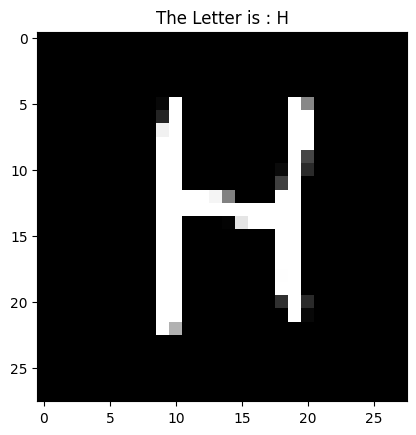

In [12]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def should_invert_colors(image):
    # Check if the image has a non-black background and white letters
    avg_color = np.mean(image)
    return avg_color > 100  # You can adjust this threshold as needed

def invert_colors(image):
    return cv2.bitwise_not(image)

def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Check if colors should be inverted
    if should_invert_colors(gray_img):
        gray_img = invert_colors(gray_img)

    # Resize the image to match your model's input size
    resized_img = cv2.resize(gray_img, (28, 28))

    # Flatten to 1D and normalize pixel values
    flattened_img = resized_img.reshape(1, 28 , 28 ,1).astype('float32') / 255.0

    return flattened_img

image_path = "/content/H.png"

input_image = preprocess_image(image_path)


predicted_class = np.argmax(loaded_model.predict(input_image), axis=1)
predicted_letter = word_dict[predicted_class[0]]


plt.imshow(input_image.reshape(28, 28), cmap='gray')
plt.title(f"The Letter is : {predicted_letter}")
plt.show()